In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
from pylab import cm
import pandas as pd

import matplotlib.font_manager as fm
font_names = [f.name for f in fm.fontManager.ttflist]

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 3)
print(colors(1))

from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def block(x): 
    # preliminaries
    n = len(x)
    d = int(log2(n))
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = var(x)
        # perform blocking transformation
        x = 0.5*(x[0:-1:2] + x[1::2])

    # generate the test observator M_k from the theorem
    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)


def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length):
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length

(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)


In [19]:
bf22_50 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_bf_stepLength_50.0_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
bf22_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_bf_stepLength_5.0_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
bf22_0_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_bf_stepLength_0.5_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
bf22_0_05 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_bf_stepLength_0.05_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
bf22_0_005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_bf_stepLength_0.005_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
# bf22_0_0005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_bf_stepLength_0.0005_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")


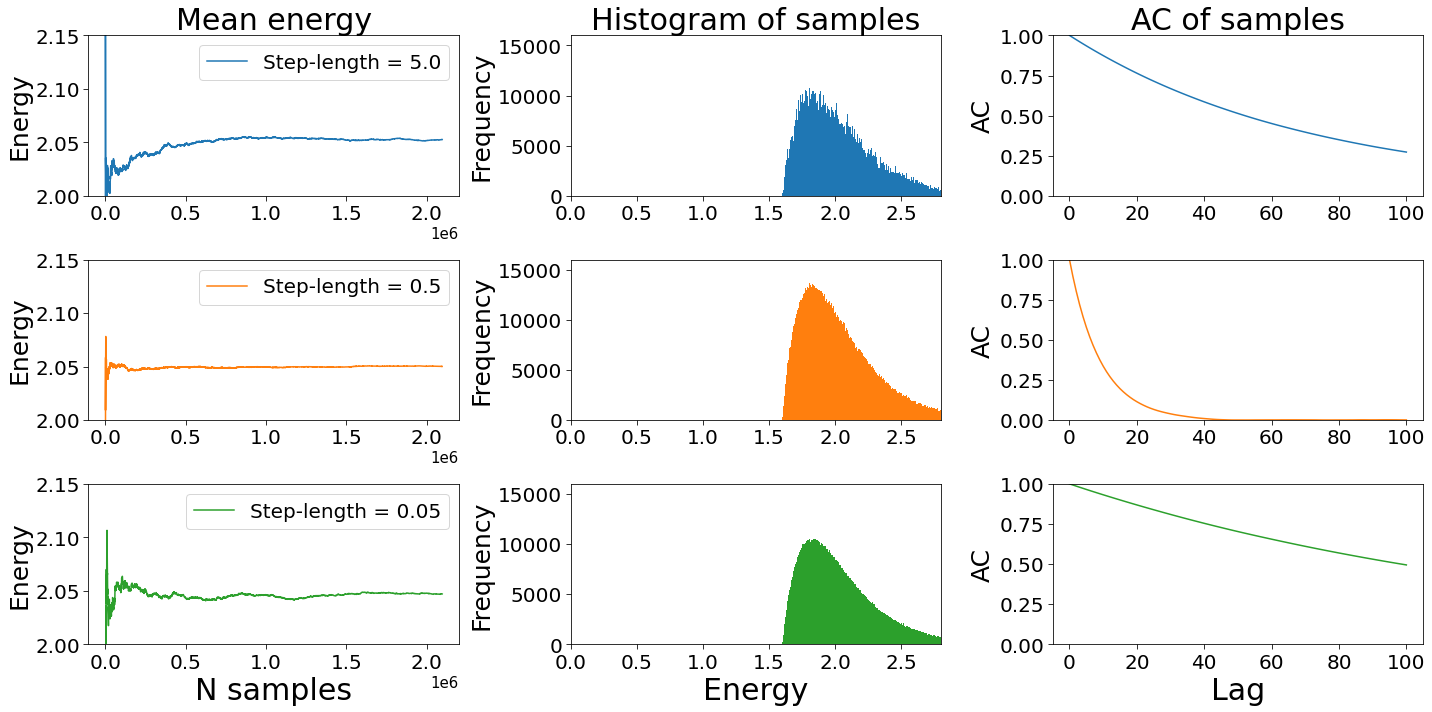

In [26]:
# plot_mcmc_diagnostic(is22_5, is22_0_5, is22_0_05, "test")
import pandas as pd
import tensorflow_probability as tfp
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

samplesList = [bf22_50, bf22_5, bf22_0_5]
steplengths = ['5.0', '0.5', '0.05']
numplots_x = 3
numplots_y = len(samplesList)

fig, ax = plt.subplots(numplots_x,numplots_y, figsize = (20,10))
fig.tight_layout(w_pad=7, h_pad=3)

styles_plot = ["#1f77b4", "#ff7f0e", "#2ca02c"]

for i, samples in zip(range(numplots_y),samplesList):
    ax[i,0].plot([j/n for j,n in zip(np.cumsum(samples), range(1,len(samples)))], styles_plot[i])
    ax[i,0].set_ylim(2.0, 2.15)
    ax[i,0].xaxis.get_offset_text().set_fontsize(15)
    ax[i,0].set_ylabel("Energy", fontsize=25)
    ax[i,0].legend(["Step-length = " + steplengths[i]], fontsize=20)

    ax[i,0].tick_params(axis='both', which='major', labelsize=20, length=5)


    ax[i,1].hist(samples, bins=1000, color=styles_plot[i])
    ax[i,1].set_xlim(0,2.8)
    ax[i,1].set_ylim(0,16000)
    ax[i,1].set_ylabel("Frequency", fontsize=25)


    ax[i,1].tick_params(axis='both', which='major', labelsize=20, length=5)


    # pd.plotting.lag_plot(pd.DataFrame(samples), lag=1, ax = ax[i,2], c= styles_plot[i], s=0.1)
    # ax[i,2].set_ylabel("S(t+1)", fontsize=25)
    # ax[i,2].set_xlim(-3, 3)
    # ax[i,2].set_ylim(-3, 3)
    ax[i,2].plot(tfp.stats.auto_correlation(samples, max_lags=100), styles_plot[i])
    ax[i,2].set_ylim(0,1.0)
    ax[i,2].set_ylabel("AC", fontsize=25)

    ax[i,2].tick_params(axis='both', which='major', labelsize=20, length=5)


ax[2,0].set_xlabel("N samples", fontsize=30)
ax[0,0].set_title("Mean energy", fontsize=30)

ax[2,1].set_xlabel("Energy", fontsize=30)
ax[0,1].set_title("Histogram of samples", fontsize=30)


ax[0,2].set_title("AC of samples", fontsize=30)
ax[2,2].set_xlabel("Lag", fontsize=30)
plt.savefig("../Plots/QDNonInteractingSlaterBF22SamplingComparison.png", bbox_inces='tight')

In [18]:
bf22 = [bf22_50,bf22_5, bf22_0_5, bf22_0_05, bf22_0_005]

energies = [block(sample)[0] for sample in bf22]
variances = [block(sample)[1] for sample in bf22]
acceptances = [acceptance_ratio(sample) for sample in bf22]
effective_samples = [tfp.mcmc.effective_sample_size(sample).numpy() for sample in bf22]



df = pd.DataFrame({"MC step-length": [50.0, 5.0, 0.5, 0.05, 0.005],"Energy" : energies, "Variance" : variances, "Acceptance ratio" : acceptances, "Effective samples" : effective_samples })
print(df.to_latex(index=False))

# \begin{tabular}{rrrr} 0.8
# \toprule
#  MC step-length &    Energy &      Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  2.052693 &  6.647601e-06 &          0.050617 \\
#           5.000 &  2.050154 &  8.592063e-07 &          0.473475 \\
#           0.500 &  2.046983 &  1.165997e-05 &          0.937274 \\
#           0.050 &  1.976068 &  3.990451e-04 &          0.994274 \\
#           0.005 &  1.954239 &  1.035320e-03 &          0.999420 \\
# \bottomrule
# \end{tabular}

# \begin{tabular}{rrrr} 0.9
# \toprule
#  MC step-length &    Energy &      Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  2.010672 &  1.508857e-06 &          0.047525 \\
#           5.000 &  2.011108 &  1.884793e-07 &          0.452414 \\
#           0.500 &  2.013876 &  2.470073e-06 &          0.933103 \\
#           0.050 &  1.993571 &  1.368553e-04 &          0.993512 \\
#           0.005 &  1.856668 &  1.933347e-05 &          0.999625 \\
# \bottomrule
# \end{tabular}

# \begin{tabular}{rrrr}
# \toprule
#  MC step-length &  Energy &  Variance &  Acceptance ratio \\
# \midrule
#          50.000 &     2.0 &       0.0 &          0.003911 \\
#           5.000 &     2.0 &       0.0 &          0.035582 \\
#           0.500 &     2.0 &       0.0 &          0.062489 \\
#           0.050 &     2.0 &       0.0 &          0.061741 \\
#           0.005 &     2.0 &       0.0 &          0.062583 \\
# \bottomrule
# \end{tabular}


# \begin{tabular}{rrrr} 1.1
# \toprule
#  MC step-length &    Energy &      Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  2.007621 &  1.438689e-06 &          0.043044 \\
#           5.000 &  2.008675 &  1.651324e-07 &          0.417017 \\
#           0.500 &  2.008651 &  1.855686e-06 &          0.926479 \\
#           0.050 &  1.991793 &  1.893570e-04 &          0.992370 \\
#           0.005 &  1.997996 &  6.606609e-04 &          0.999126 \\
# \bottomrule
# \end{tabular}

# \begin{tabular}{rrrr} 1.2
# \toprule
#  MC step-length &    Energy &      Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  2.033780 &  5.726482e-06 &          0.041095 \\
#           5.000 &  2.033478 &  6.052118e-07 &          0.401142 \\
#           0.500 &  2.033330 &  5.598252e-06 &          0.922837 \\
#           0.050 &  2.034041 &  3.255724e-04 &          0.992418 \\
#           0.005 &  1.702389 &  5.147695e-04 &          0.998824 \\
# \bottomrule
# \end{tabular}

# \begin{tabular}{rrrr} 1.3
# \toprule
#  MC step-length &    Energy &  Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  2.065123 &  0.000012 &          0.039630 \\
#           5.000 &  2.068150 &  0.000001 &          0.388008 \\
#           0.500 &  2.066671 &  0.000012 &          0.919839 \\
#           0.050 &  2.081823 &  0.000519 &          0.991920 \\
#           0.005 &  1.787220 &  0.005790 &          0.998936 \\
# \bottomrule
# \end{tabular}

0.050617218017578125
0.47347497940063477
0.9372744560241699
0.9942736625671387
0.999420166015625
\begin{tabular}{rrrrr}
\toprule
 MC step-length &    Energy &      Variance &  Acceptance ratio &  Effective samples \\
\midrule
         50.000 &  2.052693 &  6.647601e-06 &          0.050617 &       13840.214210 \\
          5.000 &  2.050154 &  8.592063e-07 &          0.473475 &      114470.904300 \\
          0.500 &  2.046983 &  1.165997e-05 &          0.937274 &        7410.359323 \\
          0.050 &  1.976068 &  3.990451e-04 &          0.994274 &          97.225708 \\
          0.005 &  1.954239 &  1.035320e-03 &          0.999420 &           4.403378 \\
\bottomrule
\end{tabular}



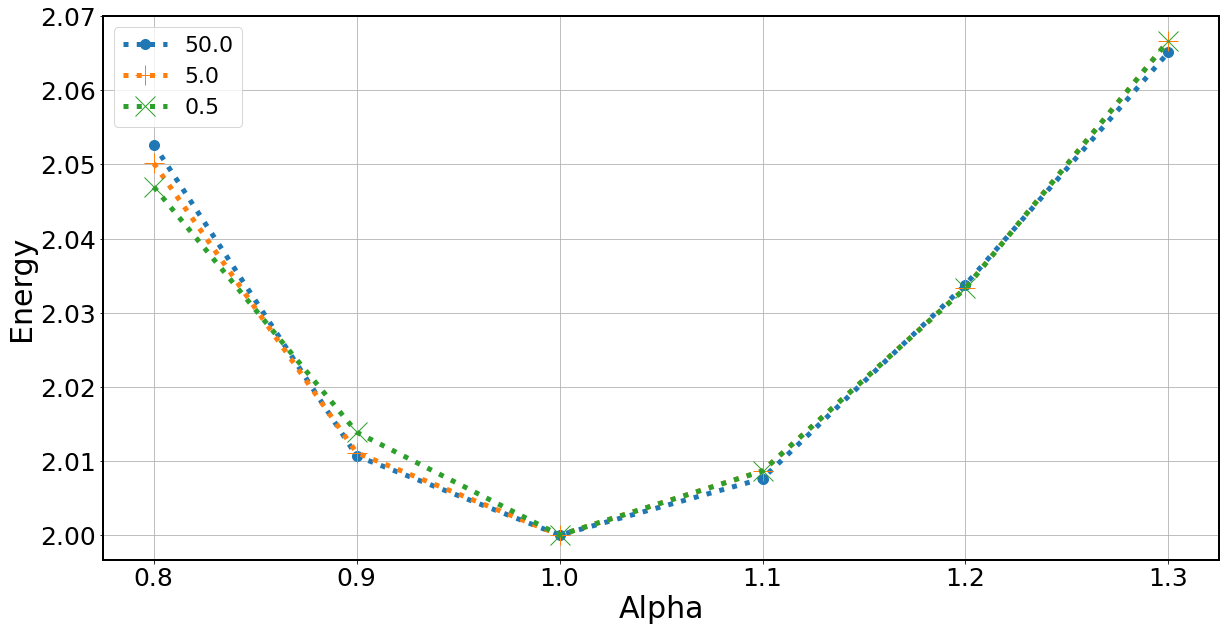

In [20]:
e_50 = [2.05269, 2.01067, 2.0, 2.00762, 2.03378, 2.06512]
e_5 = [2.05014, 2.011108, 2.0, 2.008651, 2.033330, 2.06667]
e_0_5 = [2.04698, 2.01388, 2.0, 2.00865, 2.03330, 2.066667]
# e_0_05 = [1.976, 1.9935, 2.0, 1.991793, 2.034041, 2.081823]
alpha = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3]

plt.figure(figsize=(20,10))

plt.plot(e_50, linestyle = 'dotted', marker='.', markersize= 20,linewidth=5)
plt.plot(e_5, linestyle = 'dotted', marker='+', markersize= 20,linewidth=5)
plt.plot(e_0_5, linestyle = 'dotted', marker='x', markersize= 20,linewidth=5)
plt.xlabel("Alpha", fontsize=30)
plt.ylabel("Energy", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid("on")
plt.legend([50.0, 5.0, 0.5])
plt.xticks([0, 1, 2, 3, 4, 5], alpha)
plt.savefig("../Plots/QDNonInteracting22SlaterBFEnergy.png")
# plt.plot(e_0_05)


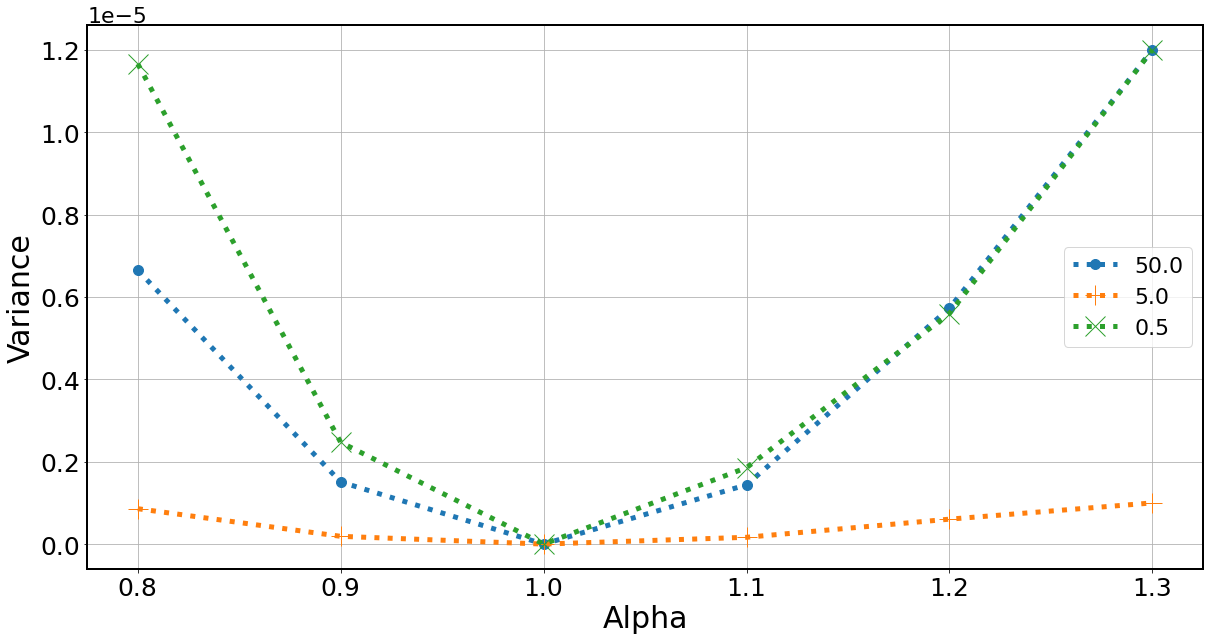

In [21]:
var_50 = [6.647601e-06, 1.508857e-06, 0.0, 1.438689e-06, 5.726482e-06, 0.000012]
var_5 = [8.592063e-07, 1.884793e-07, 0.0, 1.651324e-07, 6.052118e-07, 0.000001]
var_0_5 = [1.165997e-05, 2.470073e-06, 0.0, 1.855686e-06, 5.598252e-06, 0.000012]
alpha = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3]

plt.figure(figsize=(20,10))

plt.plot(var_50, linestyle = 'dotted', marker='.', markersize= 20,linewidth=5)
plt.plot(var_5, linestyle = 'dotted', marker='+', markersize= 20,linewidth=5)
plt.plot(var_0_5, linestyle = 'dotted', marker='x', markersize= 20,linewidth=5)
plt.legend([50.0, 5.0, 0.5])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Alpha", fontsize=30)
plt.grid("on")
plt.ylabel("Variance", fontsize=30)
plt.xticks([0, 1, 2, 3, 4, 5], alpha)
plt.savefig("../Plots/QDNonInteracting22SlaterBFVariance.png")


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

is22_50 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_50.0_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
is22_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_5.0_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
is22_0_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.5_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
is22_0_05 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.05_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
is22_0_005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.005_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")
# bf22_0_0005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_bf_stepLength_0.0005_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")


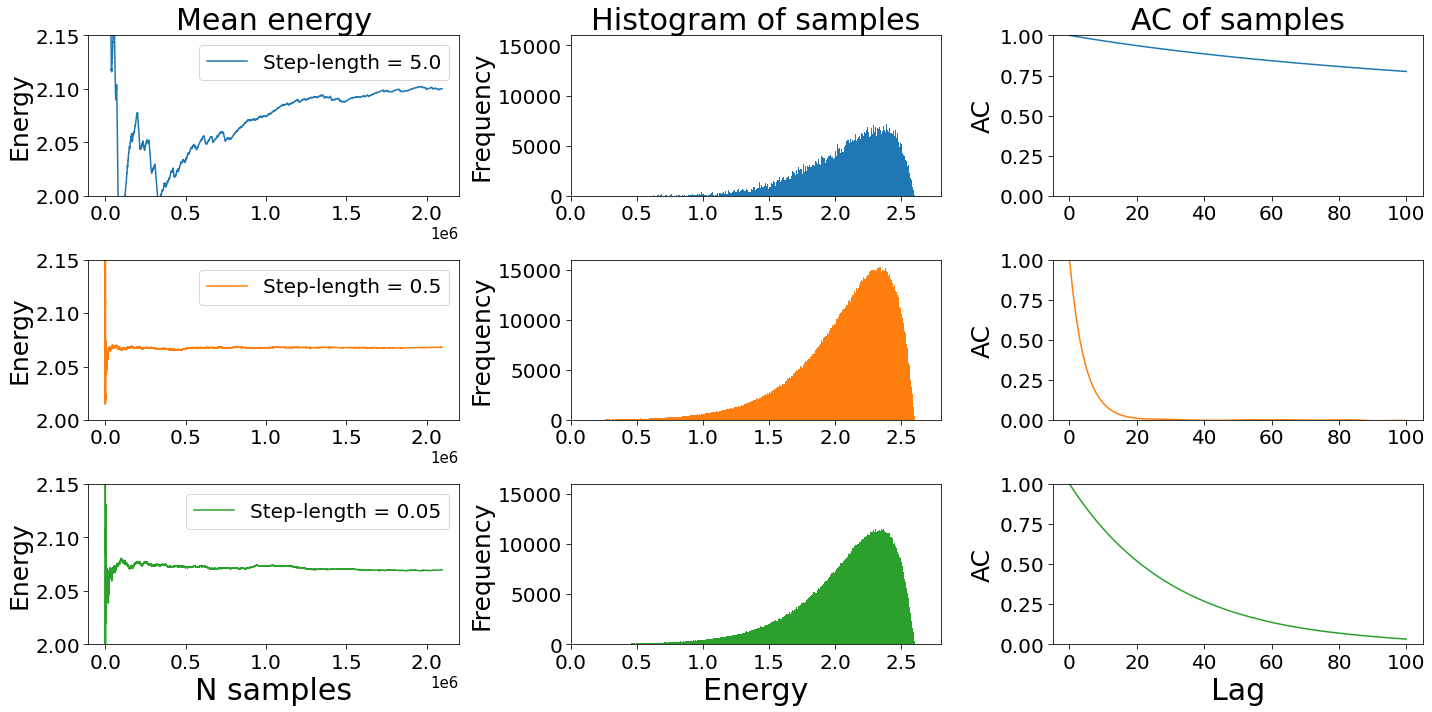

In [25]:
# plot_mcmc_diagnostic(is22_5, is22_0_5, is22_0_05, "test")
import pandas as pd
import tensorflow_probability as tfp
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

samplesList = [is22_5, is22_0_5, is22_0_05]
steplengths = ['5.0', '0.5', '0.05']
numplots_x = 3
numplots_y = len(samplesList)

fig, ax = plt.subplots(numplots_x,numplots_y, figsize = (20,10))
fig.tight_layout(w_pad=7, h_pad=3)

styles_plot = ["#1f77b4", "#ff7f0e", "#2ca02c"]

for i, samples in zip(range(numplots_y),samplesList):
    ax[i,0].plot([j/n for j,n in zip(np.cumsum(samples), range(1,len(samples)))], styles_plot[i])
    ax[i,0].set_ylim(2.0, 2.15)
    ax[i,0].xaxis.get_offset_text().set_fontsize(15)
    ax[i,0].set_ylabel("Energy", fontsize=25)
    ax[i,0].legend(["Step-length = " + steplengths[i]], fontsize=20)

    ax[i,0].tick_params(axis='both', which='major', labelsize=20, length=5)


    ax[i,1].hist(samples, bins=1000, color=styles_plot[i])
    ax[i,1].set_xlim(0,2.8)
    ax[i,1].set_ylim(0,16000)
    ax[i,1].set_ylabel("Frequency", fontsize=25)


    ax[i,1].tick_params(axis='both', which='major', labelsize=20, length=5)


    # pd.plotting.lag_plot(pd.DataFrame(samples), lag=1, ax = ax[i,2], c= styles_plot[i], s=0.1)
    # ax[i,2].set_ylabel("S(t+1)", fontsize=25)
    # ax[i,2].set_xlim(-3, 3)
    # ax[i,2].set_ylim(-3, 3)
    ax[i,2].plot(tfp.stats.auto_correlation(samples, max_lags=100), styles_plot[i])
    ax[i,2].set_ylim(0,1.0)
    ax[i,2].set_ylabel("AC", fontsize=25)

    ax[i,2].tick_params(axis='both', which='major', labelsize=20, length=5)


ax[2,0].set_xlabel("N samples", fontsize=30)
ax[0,0].set_title("Mean energy", fontsize=30)

ax[2,1].set_xlabel("Energy", fontsize=30)
ax[0,1].set_title("Histogram of samples", fontsize=30)


ax[0,2].set_title("AC of samples", fontsize=30)
ax[2,2].set_xlabel("Lag", fontsize=30)
plt.savefig("../Plots/QDNonInteractingSlaterIS22SamplingComparison.png", bbox_inces='tight')


In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

is62_0_03 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.03_numMCSteps_4194304_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")
is62_0_01 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.01_numMCSteps_4194304_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")
is62_0_009 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.009_numMCSteps_4194304_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")
is62_0_007 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.007_numMCSteps_4194304_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")
# is62_0_0005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.0005_numMCSteps_8388608_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")
# bf22_0_0005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_bf_stepLength_0.0005_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_.txt")


In [16]:
# plot_mcmc_diagnostic(is22_5, is22_0_5, is22_0_05, "test")
import pandas as pd
import tensorflow_probability as tfp
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

samplesList = [is62_0_1, is62_0_01, is62_0_001]
steplengths = ['0.1', '0.01', '0.001']
numplots_x = 3
numplots_y = len(samplesList)

fig, ax = plt.subplots(numplots_x,numplots_y, figsize = (20,10))
fig.tight_layout(w_pad=7, h_pad=3)

styles_plot = ["#1f77b4", "#ff7f0e", "#2ca02c"]

for i, samples in zip(range(numplots_y),samplesList):
    ax[i,0].plot([j/n for j,n in zip(np.cumsum(samples), range(1,len(samples)))], styles_plot[i])
    ax[i,0].set_ylim(10.0, 11.0)
    ax[i,0].xaxis.get_offset_text().set_fontsize(15)
    ax[i,0].set_ylabel("Energy", fontsize=25)
    ax[i,0].legend(["Step-length = " + steplengths[i]], fontsize=20)

    ax[i,0].tick_params(axis='both', which='major', labelsize=20, length=5)


    ax[i,1].hist(samples, bins=1000, color=styles_plot[i])
    ax[i,1].set_xlim(8,12)
    ax[i,1].set_ylim(0,6000)
    ax[i,1].set_ylabel("Frequency", fontsize=25)


    ax[i,1].tick_params(axis='both', which='major', labelsize=20, length=5)


    # pd.plotting.lag_plot(pd.DataFrame(samples), lag=1, ax = ax[i,2], c= styles_plot[i], s=0.1)
    # ax[i,2].set_ylabel("S(t+1)", fontsize=25)
    # ax[i,2].set_xlim(-3, 3)
    # ax[i,2].set_ylim(-3, 3)
    ax[i,2].plot(tfp.stats.auto_correlation(samples, max_lags=1000), styles_plot[i])
    ax[i,2].set_ylim(0,1.0)
    ax[i,2].set_ylabel("AC", fontsize=25)

    ax[i,2].tick_params(axis='both', which='major', labelsize=20, length=5)


ax[2,0].set_xlabel("N samples", fontsize=30)
ax[0,0].set_title("Cumulative mean energy", fontsize=30)

ax[2,1].set_xlabel("Energy", fontsize=30)
ax[0,1].set_title("Histogram of samples", fontsize=30)


ax[0,2].set_title("AC of samples", fontsize=30)
ax[2,2].set_xlabel("Lag", fontsize=30)
plt.savefig("../Plots/QDNonInteractingSlaterIS62SamplingComparison.png", bbox_inces='tight')


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [4]:
import tensorflow_probability as tfp

is62 = [is62_0_1, is62_0_01, is62_0_001]

energies = [block(sample)[0] for sample in is62]
variances = [block(sample)[1] for sample in is62]
acceptances = [acceptance_ratio(sample) for sample in is62]
effective_samples = [tfp.mcmc.effective_sample_size(sample).numpy() for sample in is62]


df = pd.DataFrame({"MC step-length": [0.1, 0.01, 0.001],"Energy" : energies, "Variance" : variances, "Acceptance ratio" : acceptances , "Effective samples": effective_samples})
print(df.to_latex(index=False))

0.02534174919128418
0.49480533599853516
0.985790491104126
\begin{tabular}{rrrrr}
\toprule
 MC step-length &     Energy &  Variance &  Acceptance ratio &  Effective samples \\
\midrule
          0.100 &  10.628548 &  0.000279 &          0.025342 &           6.793212 \\
          0.010 &  10.334748 &  0.000006 &          0.494805 &        7053.868114 \\
          0.001 &  10.064716 &  0.000093 &          0.985790 &         562.829425 \\
\bottomrule
\end{tabular}



In [16]:
import tensorflow_probability as tfp

is22 = [is22_50,is22_5, is22_0_5, is22_0_05, is22_0_005]

energies = [block(sample)[0] for sample in is22]
variances = [block(sample)[1] for sample in is22]
acceptances = [acceptance_ratio(sample) for sample in is22]
effective_samples = [tfp.mcmc.effective_sample_size(sample).numpy() for sample in is22]


df = pd.DataFrame({"MC step-length": [50.0, 5.0, 0.5, 0.05, 0.005],"Energy" : energies, "Variance" : variances, "Acceptance ratio" : acceptances , "Effective samples": effective_samples})
print(df.to_latex(index=False))

# \begin{tabular}{rrrr} 0.8
# \toprule
#  MC step-length &    Energy &      Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  1.822170 &  3.411570e-05 &          0.008008 \\
#           5.000 &  2.041366 &  9.843644e-06 &          0.216846 \\
#           0.500 &  2.047921 &  5.271038e-07 &          0.942981 \\
#           0.050 &  2.051757 &  4.646363e-06 &          0.998190 \\
#           0.005 &  2.046428 &  4.880631e-05 &          0.999939 \\
# \bottomrule
# \end{tabular}

# \begin{tabular}{rrrr} 0.9
# \toprule
#  MC step-length &    Energy &      Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  1.854641 &  9.568362e-06 &          0.009332 \\
#           5.000 &  2.011012 &  5.377158e-06 &          0.183027 \\
#           0.500 &  2.010493 &  1.137723e-07 &          0.932564 \\
#           0.050 &  2.010792 &  8.733388e-07 &          0.997888 \\
#           0.005 &  2.017512 &  9.451997e-06 &          0.999932 \\
# \bottomrule
# \end{tabular}

# \begin{tabular}{rrrr} 1.1
# \toprule
#  MC step-length &    Energy &      Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  1.854641 &  9.568362e-06 &          0.009332 \\
#           5.000 &  2.011981 &  1.109696e-05 &          0.137673 \\
#           0.500 &  2.009469 &  8.046632e-08 &          0.908984 \\
#           0.050 &  2.010266 &  5.735252e-07 &          0.997049 \\
#           0.005 &  2.007522 &  6.362095e-06 &          0.999907 \\
# \bottomrule
# \end{tabular}

# \begin{tabular}{rrrr} 1.2
# \toprule
#  MC step-length &    Energy &      Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  1.854641 &  9.568362e-06 &          0.009332 \\
#           5.000 &  2.044606 &  8.535603e-05 &          0.121413 \\
#           0.500 &  2.033207 &  2.891433e-07 &          0.896425 \\
#           0.050 &  2.034674 &  1.965245e-06 &          0.996672 \\
#           0.005 &  2.033149 &  1.893068e-05 &          0.999901 \\
# \bottomrule
# \end{tabular}

# \toprule 1.3
#  MC step-length &    Energy &      Variance &  Acceptance ratio \\
# \midrule
#          50.000 &  1.854641 &  9.568362e-06 &          0.009332 \\
#           5.000 &  2.100144 &  1.153705e-04 &          0.108169 \\
#           0.500 &  2.068096 &  5.793456e-07 &          0.883380 \\
#           0.050 &  2.069608 &  3.680611e-06 &          0.996272 \\
#           0.005 &  2.067766 &  3.363264e-05 &          0.999871 \\
# \bottomrule
# \end{tabular}




0.009331703186035156
0.1081690788269043
0.8833799362182617
0.9962716102600098
0.999870777130127
\begin{tabular}{rrrrr}
\toprule
 MC step-length &    Energy &      Variance &  Acceptance ratio &  Effective samples \\
\midrule
         50.000 &  1.854641 &  9.568362e-06 &          0.009332 &          28.071143 \\
          5.000 &  2.100144 &  1.153705e-04 &          0.108169 &         562.694670 \\
          0.500 &  2.068096 &  5.793456e-07 &          0.883380 &      233665.363584 \\
          0.050 &  2.069608 &  3.680611e-06 &          0.996272 &       34892.614538 \\
          0.005 &  2.067766 &  3.363264e-05 &          0.999871 &        3345.079194 \\
\bottomrule
\end{tabular}



In [15]:
effective_samples[0].numpy()

28.071142813668956

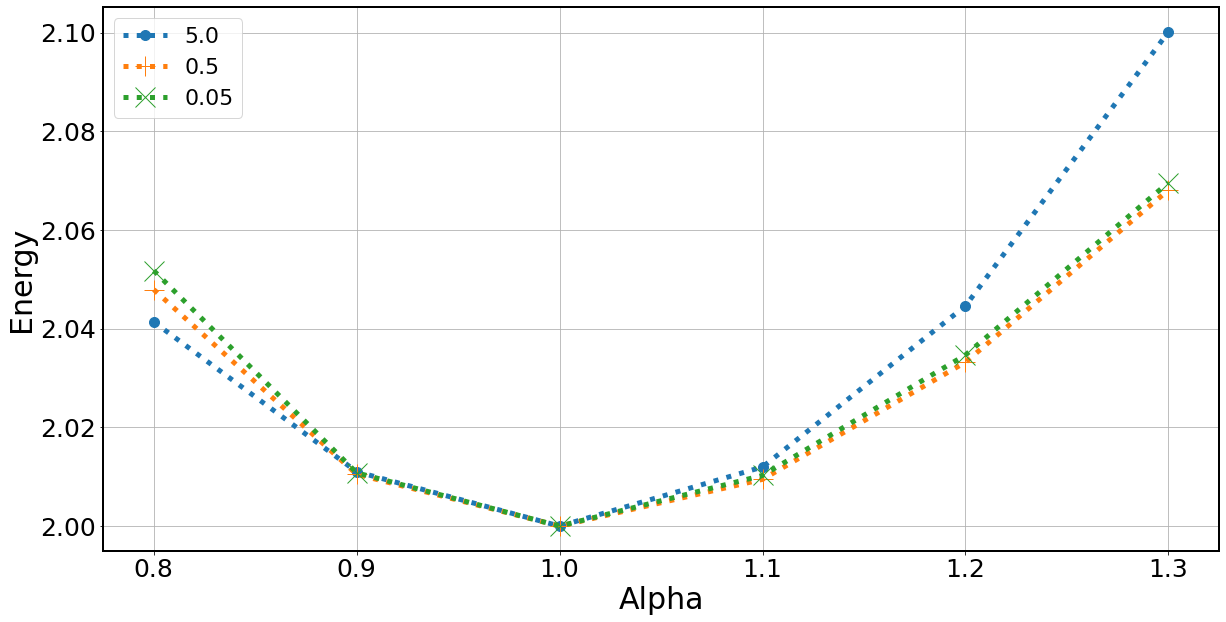

In [13]:
e_5 = [2.041366, 2.011012, 2.0, 2.011981, 2.044606, 2.100144]
e_0_5 = [2.047921, 2.010493, 2.0, 2.009469, 2.033207, 2.068096]
e_0_05 = [2.051757, 2.010792, 2.0, 2.010266, 2.034674, 2.069608]

plt.figure(figsize=(20,10))

plt.plot(e_5, linestyle = 'dotted', marker='.', markersize= 20,linewidth=5)
plt.plot(e_0_5, linestyle = 'dotted', marker='+', markersize= 20,linewidth=5)
plt.plot(e_0_05, linestyle = 'dotted', marker='x', markersize= 20,linewidth=5)
plt.xlabel("Alpha", fontsize=30)
plt.ylabel("Energy", fontsize=30)
plt.grid("on")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend([5.0, 0.5, 0.05])
plt.xticks([0, 1, 2, 3, 4, 5], alpha)
plt.savefig("../Plots/QDNonInteracting22SlaterISEnergy.png")
# plt.plot(e_0_05)

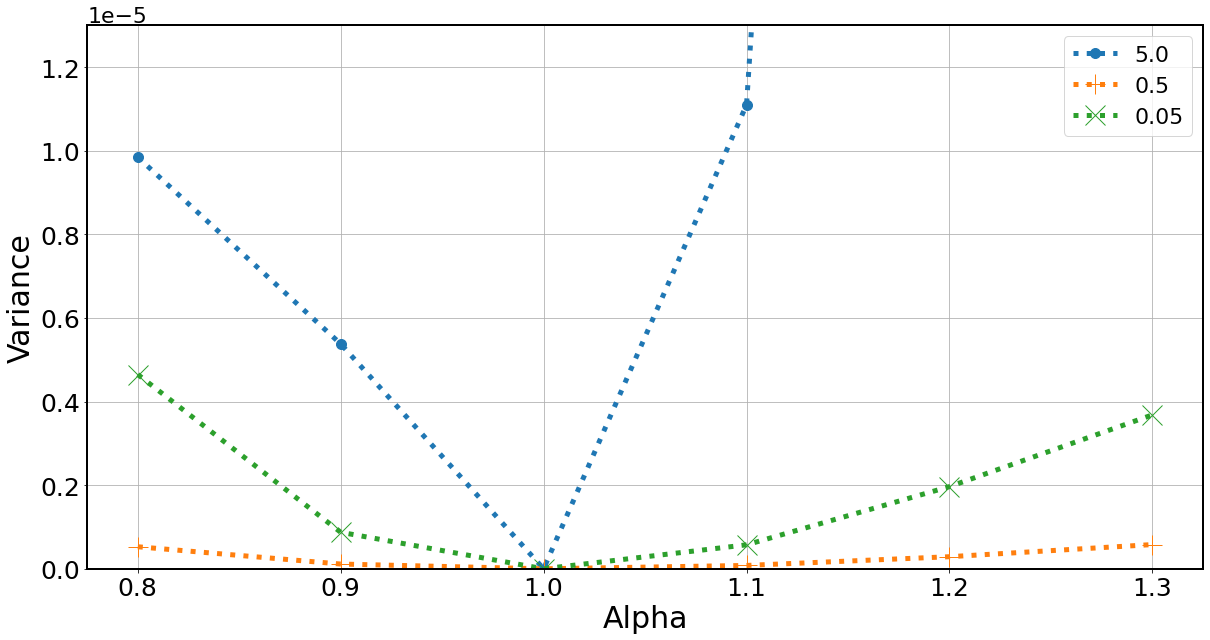

In [16]:
var_5 = [9.843644e-06, 5.377158e-06, 0.0, 1.109696e-05, 8.535603e-05, 1.153705e-04]
var_0_5 = [5.271038e-07, 1.137723e-07, 0.0, 8.046632e-08, 2.891433e-07, 5.793456e-07 ]
var_0_05 = [4.646363e-06, 8.733388e-07, 0.0, 5.735252e-07, 1.965245e-06, 3.680611e-06]

alpha = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3]

plt.figure(figsize=(20,10))

plt.plot(var_5, linestyle = 'dotted', marker='.', markersize= 20,linewidth=5)
plt.plot(var_0_5, linestyle = 'dotted', marker='+', markersize= 20,linewidth=5)
plt.plot(var_0_05, linestyle = 'dotted', marker='x', markersize= 20,linewidth=5)
plt.legend([5.0, 0.5, 0.05])
plt.xlabel("Alpha", fontsize=30)
plt.grid("on")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel("Variance", fontsize=30)
plt.ylim((0.0, 0.000013))
plt.xticks([0, 1, 2, 3, 4, 5], alpha)
plt.savefig("../Plots/QDNonInteracting22SlaterISVariance.png")

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
from pylab import cm
import pandas as pd

import matplotlib.font_manager as fm
font_names = [f.name for f in fm.fontManager.ttflist]

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 3)
print(colors(1))

from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def plot_mcmc_diagnostic(data1, data2, data3, filename):

    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_axes([0,0,0.45,0.2])

    minimum = 1.99
    maximum = 2.04

    ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax2 = fig.add_axes([0,1/3.,0.45,0.2])
    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax3 = fig.add_axes([0.0,2/3.,0.45,0.2])
    ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax1.plot(data1, linewidth=2, color = colors(0))
    ax1.set_xlabel("Iteration", labelpad=10)
    ax1.set_ylabel("Energy (a.u)", labelpad=10)
    ax1.set_title("Trace-plot. MC step-length = 0.05", pad=10)
    # ax1.set_ylim((minimum, maximum))

    ax2.plot(data2, linewidth=2, color = colors(1))
    ax2.set_ylabel("Energy (a.u)", labelpad=10)
    ax2.set_xlabel("Iteration", labelpad=10)
    ax2.set_title("Trace-plot. MC step-length = 0.5", pad=10)
    # ax2.set_ylim((minimum, maximum))


    ax3.plot(data3, linewidth=2, color = colors(2))
    ax3.set_xlabel("Iteration", labelpad=10)
    ax3.set_ylabel("Energy (a.u)", labelpad=10)
    ax3.set_title("Trace-plot. MC step-length = 5.0", pad=10)
    # ax3.set_ylim((minimum, maximum))


    ax4 = fig.add_axes([0.55,0,0.15,0.2])
    ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax5 = fig.add_axes([0.55,1/3.,0.15,0.2])
    ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax6 = fig.add_axes([0.55,2/3.,0.15,0.2])
    ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax4.hist(data1, linewidth=2, color = colors(0), bins=100)
    ax4.set_xlabel("Energy (a.u)", labelpad=10)
    ax4.set_ylabel("Frequency", labelpad=10)
    ax4.set_title("Histogram. MC step-length = 0.05", pad=10)
    # ax4.set_xlim((minimum, maximum))


    ax5.hist(data2, linewidth=2, color = colors(1), bins=100)
    ax5.set_xlabel("Energy (a.u)", labelpad=10)
    ax5.set_ylabel("Frequency", labelpad=10)
    ax5.set_title("Histogram. MC step-length = 0.5", pad=10)
    # ax5.set_xlim((minimum, maximum))


    ax6.hist(data3, linewidth=2, color = colors(2), bins=100)
    ax6.set_xlabel("Energy (a.u)", labelpad=10)
    ax6.set_ylabel("Frequency", labelpad=10)
    ax6.set_title("Histogram. MC step-length = 5.0", pad=10)
    # ax6.set_xlim(minimum, maximum)

    ax7 = fig.add_axes([0.8,0,0.15,0.2])
    ax7.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax7.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax8= fig.add_axes([0.8,1/3.,0.15,0.2])
    ax8.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax8.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax9 = fig.add_axes([0.8,2/3.,0.15,0.2])
    ax9.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax9.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    pd.plotting.lag_plot(pd.DataFrame(data1), lag=1, ax = ax7, c=colors(0))
    ax7.set_title("Correlation plot. MC step-length = 0.05", pad=10)
    # ax7.hist(data, linewidth=2, color = colors(0))
    # ax7.set_xlabel("Energy (a.u)", labelpad=10)
    # ax7.set_ylabel("Frequency", labelpad=10)

    pd.plotting.lag_plot(pd.DataFrame(data2), lag=1, ax = ax8, c=colors(1))
    ax8.set_title("Correlation plot. MC step-length = 0.5", pad=10)

    # ax8.hist(data, linewidth=2, color = colors(1))
    # ax8.set_xlabel("Energy (a.u)", labelpad=10)
    # ax8.set_ylabel("Frequency", labelpad=10)

    pd.plotting.lag_plot(pd.DataFrame(data3), lag=1, ax = ax9, c=colors(2))
    ax9.set_title("Correlation plot. MC step-length = 5.0", pad=10)

    # ax9.hist(data, linewidth=2, color = colors(2))
    # ax9.set_xlabel("Energy (a.u)", labelpad=10)
    # ax9.set_ylabel("Frequency", labelpad=10)

    plt.savefig(filename, bbox_inches='tight')

def block(x): 
    # preliminaries
    n = len(x)
    d = int(log2(n))
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = var(x)
        # perform blocking transformation
        x = 0.5*(x[0:-1:2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)


def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length

(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)


In [20]:
is62_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_5.0_numMCSteps_2097152_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")
is62_0_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.5_numMCSteps_2097152_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")
is62_0_05 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.05_numMCSteps_2097152_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")
is62_0_005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.005_numMCSteps_2097152_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")
is62_0_0005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_sysInfo_is_stepLength_0.0005_numMCSteps_2097152_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_.txt")


KeyboardInterrupt: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


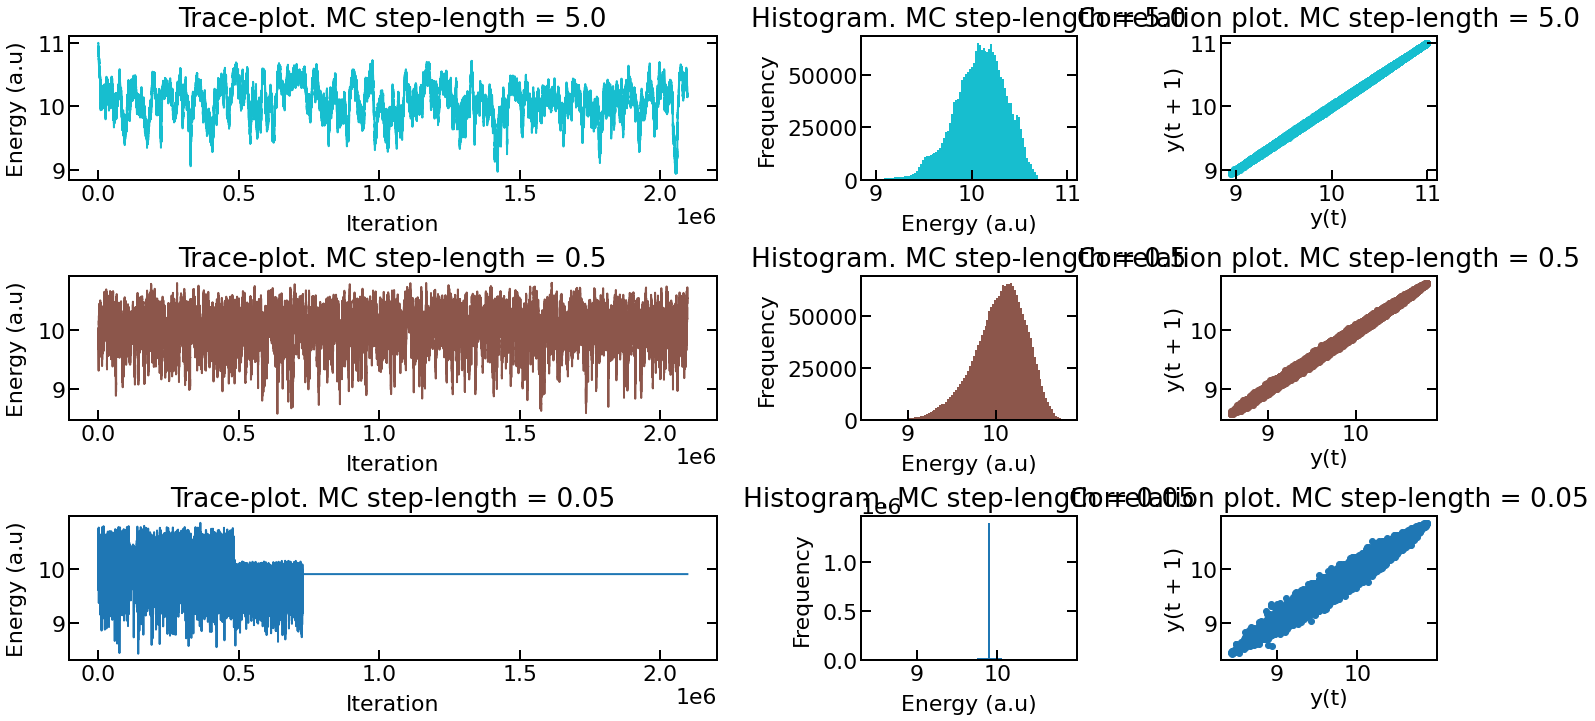

In [24]:
plot_mcmc_diagnostic(is62_0_05, is62_0_005, is62_0_0005, "test")